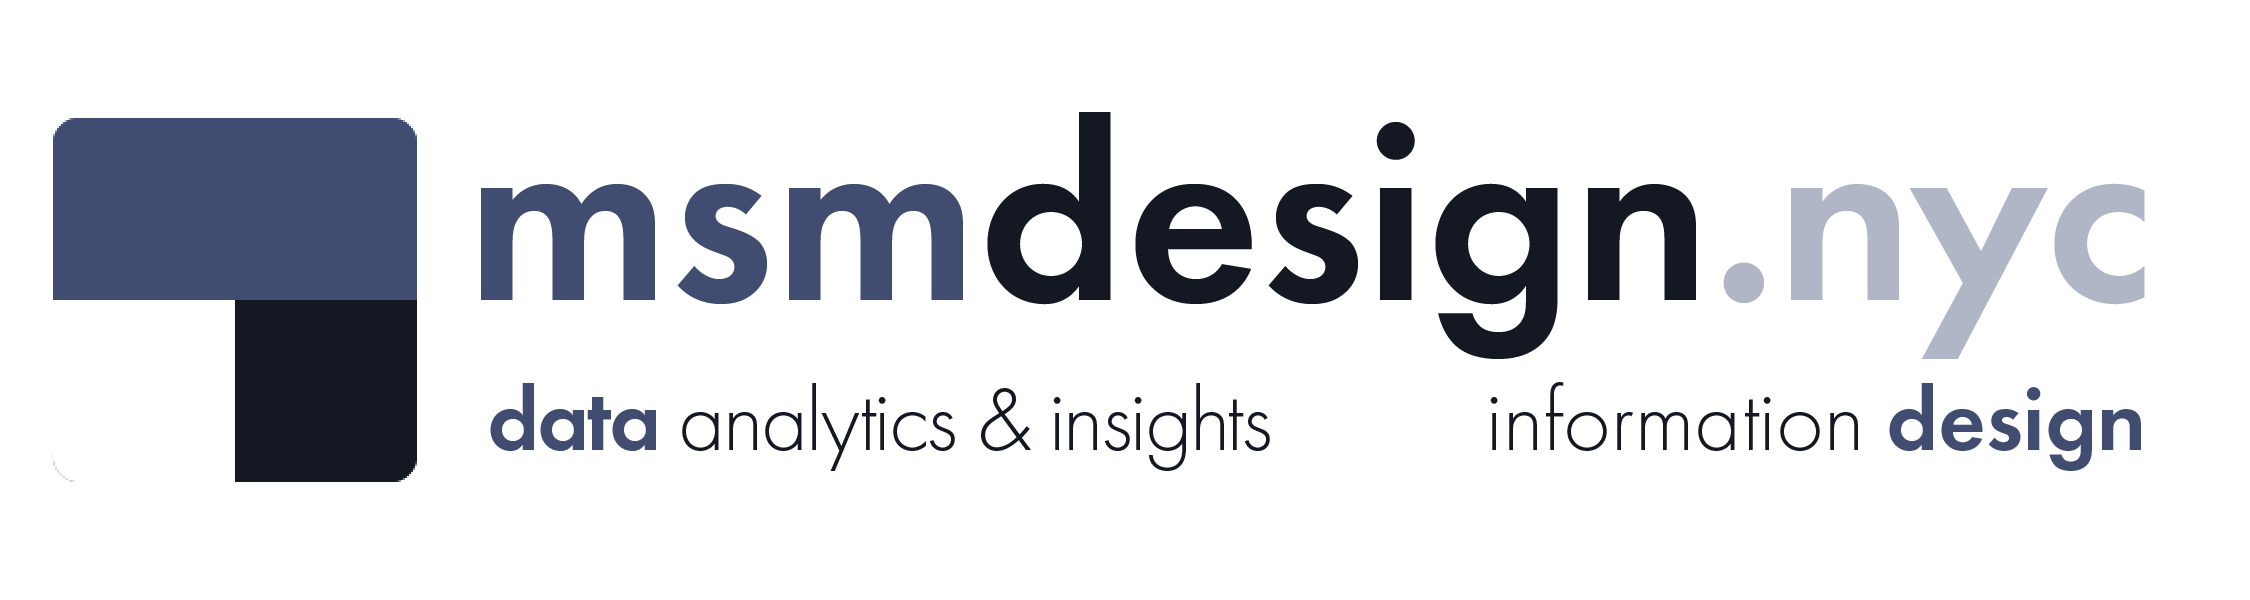

---
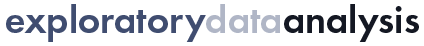

---

> ### What is Exploratory Data Analysis?
> **Exploratory data analysis (EDA)** is a technique used by data scientists to inspect, characterize and briefly summarize the contents of a dataset. EDA is often the first step when encountering a new or unfamiliar dataset. EDA helps the data scientist become acquainted with a dataset and test some basic assumptions about the data. By the end of the EDA process, some initial insights can be drawn from the dataset and a framework for further analysis or modeling is established.

---

# Storefronts Reported Vacant or Not

**Dataset Analyzed:** *Storefronts Reported Vacant or Not*

**About This Dataset:** Storefronts Reported Vacant or Not. The dataset was created to comply with Local Law 157 of 2019. Data is collected using an online portal, which allows owners to provide information about ground and second floor storefronts on their properties.

Each row shows a ground floor or second floor storefront that was registered with the department as of December 31 of the reporting year and legally required updates provided as of June 30 (or date sold if earlier) of the calendar year immediately following the reporting year. Each row contains the property's borough, block and lot number and the storefront's street address (and zip code), either field can be used to search for individual storefronts. Data provided by the Department of Department of Finance (DOF), the City of New York: https://data.cityofnewyork.us/Business/NYC-Business-Acceleration-Businesses-Served-and-Jo/9b9u-8989



**Acknowledgements:** NYC Open Data https://opendata.cityofnewyork.us/


**EDA Catalogue Number:** INS-011


**EDA Publication Date:** Thursday, January 12, 2023


**Language:** Python


**Libraries Used:** NumPy, pandas, matplotlib, seaborn


**EDA Author:** David White


**Contact:** david@msmdesign.nyc | [msmdesign.nyc](https://msmdesign.nyc/)

---

## **0. Prepare the workspace**

### 0.1 Import Python libraries, packages and functions

In [1]:
# import libraries for data wrangling, aggregate functions and basic descriptive statistics
import numpy as np
import pandas as pd

# import data visualization packages
import matplotlib.pyplot as plt
import seaborn as sns

### 0.2 Adjust display options to make plots easier to read and understand

In [2]:
# specify seaborn styling options
sns.set_theme(
    context='talk', 
    style='whitegrid', 
    palette='viridis',
    font='Courier New', 
    font_scale=1.15)    

# allow plots to display inline within the notebook
%matplotlib inline

### 0.3 Set Markdown tables to align-left within notebook cells

In [3]:
%%html
<style>
table {float:left}
</style>

### 0.4 Display all rows of output by default

In [4]:
pd.set_option('display.max_rows', None)

# to reset:
# pd.reset_option('display.max_rows')

### 0.5 Format large numbers and display floating point values to two decimal places

In [5]:
pd.set_option('display.float_format',  '{:,.2f}'.format)

# to reset:
# pd.reset_option('display.float_format')

### 0.6 Load the raw data file into the notebook and visually confirm that it has been read in as expected

In [7]:
# load the data from a csv file (stored locally) into a new DataFrame object

csv = r"F:\Creative Cloud Files\MSM Client 001 - Mister Shepherd Media LLC\MSM Design\github_msm_design\exploratory-data-analysis\insights-made-fresh-daily\nyc-open-data\ins-011\data\Storefronts_Reported_Vacant_or_Not.csv"

storefronts = pd.read_csv(csv, encoding='utf-8', low_memory=False)

In [8]:
# glimpse the first three rows

storefronts.head(3)

,Reporting Year,BOROUGH-BLOCK-LOT,PROPERTY STREET ADDRESS OR STOREFRONT ADDRESS,BOROUGH,ZIP CODE,SOLD DATE,VACANT ON 12/31,CONSTRUCTION REPORTED,VACANT 6/30 OR DATE SOLD IF EARLIER,PRIMARY BUSINESS ACTIVITY,...,POSTCODE,LATITUDE,LONGITUDE,COMMUNITY BOARD,COUNCIL DISTRICT,CENSUS TRACT,BIN,BBL,NTA,NBHD
0,2019 and 2020,1000010010,1 GOVERNORS ISLAND,MANHATTAN,10004,NaN,YES,NaN,YES,NO BUSINESS ACTIVITY IDENTIFIED,...,10004,40.69,-74.02,1.00,1.00,5,"1,086,389.00",1000010010,MN99,park-cemetery-etc-Manhattan
1,2019 and 2020,1000050010,115 BROAD STREET,MANHATTAN,10004,NaN,NO,NaN,YES,OTHER,...,10004,40.70,-74.01,1.00,1.00,9,"1,000,007.00",1000050010,MN25,Battery Park City-Lower Manhattan
2,2019 and 2020,1000050010,115 BROAD STREET,MANHATTAN,10004,NaN,NO,NaN,YES,RETAIL,...,10004,40.70,-74.01,1.00,1.00,9,"1,000,007.00",1000050010,MN25,Battery Park City-Lower Manhattan


In [9]:
# glimpse the last three rows

storefronts.tail(3)

,Reporting Year,BOROUGH-BLOCK-LOT,PROPERTY STREET ADDRESS OR STOREFRONT ADDRESS,BOROUGH,ZIP CODE,SOLD DATE,VACANT ON 12/31,CONSTRUCTION REPORTED,VACANT 6/30 OR DATE SOLD IF EARLIER,PRIMARY BUSINESS ACTIVITY,...,POSTCODE,LATITUDE,LONGITUDE,COMMUNITY BOARD,COUNCIL DISTRICT,CENSUS TRACT,BIN,BBL,NTA,NBHD
214243,2021 and 2022,5080460001,7423-25 Amboy Road,STATEN ISLAND,10307,NaN,NO,NaN,NaN,FOOD SERVICES,...,10307,40.51,-74.24,3.00,51.00,248,"5,107,890.00",5080460001,SI11,Charleston-Richmond Valley-Tottenville
214244,2021 and 2022,5080460013,7447 AMBOY RD,STATEN ISLAND,10307,NaN,NO,NaN,NaN,OTHER,...,10307,40.51,-74.24,3.00,51.00,248,"5,107,893.00",5080460013,SI11,Charleston-Richmond Valley-Tottenville
214245,2021 and 2022,5080470023,241 Main street,STATEN ISLAND,10307,NaN,NO,NaN,NaN,FINANCE & INSURANCE,...,10307,40.51,-74.25,3.00,51.00,248,"5,089,267.00",5080470023,SI11,Charleston-Richmond Valley-Tottenville


In [10]:
# glimpse ten randomly selected rows

storefronts.sample(10, random_state=89)

,Reporting Year,BOROUGH-BLOCK-LOT,PROPERTY STREET ADDRESS OR STOREFRONT ADDRESS,BOROUGH,ZIP CODE,SOLD DATE,VACANT ON 12/31,CONSTRUCTION REPORTED,VACANT 6/30 OR DATE SOLD IF EARLIER,PRIMARY BUSINESS ACTIVITY,...,POSTCODE,LATITUDE,LONGITUDE,COMMUNITY BOARD,COUNCIL DISTRICT,CENSUS TRACT,BIN,BBL,NTA,NBHD
53822,2019 and 2020,3076180138,1777 FLATBUSH AVENUE,BROOKLYN,11210,NaN,NO,NaN,NaN,FINANCE & INSURANCE,...,11210,40.63,-73.94,18.00,45.00,740,"3,208,259.00",3076180138,BK58,Flatlands
96104,2020 and 2021,1015340012,226 East 89th St.,MANHATTAN,10128,NaN,NO,NaN,NaN,RETAIL,...,10128,40.78,-73.95,8.00,5.00,146,"1,048,836.00",1015340012,MN32,Yorkville
68834,2019 and 2020,4095650044,128-11 LIBERTY AVENUE,QUEENS,11419,NaN,YES,NaN,NaN,NO BUSINESS ACTIVITY IDENTIFIED,...,11419,40.69,-73.82,10.00,28.00,158,"4,203,996.00",4095650044,QN55,South Ozone Park
53433,2019 and 2020,3074220002,2952 AVENUE X,BROOKLYN,11235,NaN,NO,NaN,NaN,OTHER,...,11235,40.59,-73.94,15.00,48.00,594,"3,327,536.00",3074220002,BK17,Sheepshead Bay-Gerritsen Beach-Manhattan Beach
37907,2019 and 2020,3002020001,28 OLD FULTO N ST,BROOKLYN,11201,NaN,NO,NaN,NaN,NO BUSINESS ACTIVITY IDENTIFIED,...,11201,40.70,-73.99,2.00,33.00,1,"3,001,475.00",3002020001,BK09,Brooklyn Heights-Cobble Hill
100648,2020 and 2021,1021420237,700 West 175 Street Store #5,MANHATTAN,10033,NaN,NO,NaN,NaN,FOOD SERVICES,...,10033,40.85,-73.94,12.00,10.00,263,"1,063,517.00",1021420237,MN36,Washington Heights South
184697,2021 and 2022,3005990002,201 RICHARDS STREET,BROOKLYN,11231,NaN,NO,NaN,NaN,MISCELLANEOUS OTHER SERVICE,...,11231,40.67,-74.01,6.00,38.00,53,"3,008,818.00",3005990002,BK33,Carroll Gardens-Columbia Street-Red Hook
2270,2019 and 2020,1002390038,90 BOWERY,MANHATTAN,10013,NaN,YES,NaN,NaN,NO BUSINESS ACTIVITY IDENTIFIED,...,10013,40.72,-74.00,2.00,1.00,41,"1,003,136.00",1002390038,MN24,SoHo-TriBeCa-Civic Center-Little Italy
44191,2019 and 2020,3026500035,139 NASSAU AVENUE,BROOKLYN,11222,NaN,NO,NaN,NaN,FOOD SERVICES,...,11222,40.72,-73.95,1.00,33.00,571,"3,066,255.00",3026500035,BK76,Greenpoint
207318,2021 and 2022,4060770048,34-51 FRANCIS LEWIS BLVD,QUEENS,11358,NaN,NO,NaN,NaN,OTHER,...,11358,40.76,-73.79,11.00,19.00,1099,"4,446,961.00",4060770048,QN46,Bayside-Bayside Hills


**The data has been loaded and has been read in as expected.**

### 0.7. Check the data type of each column

In [11]:
# display a listing of each of the DataFrame's columns and its data type

storefronts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214246 entries, 0 to 214245
Data columns (total 24 columns):
 #   Column                                         Non-Null Count   Dtype  
---  ------                                         --------------   -----  
 0   Reporting Year                                 214246 non-null  object 
 1   BOROUGH-BLOCK-LOT                              214246 non-null  int64  
 2   PROPERTY STREET ADDRESS OR STOREFRONT ADDRESS  214245 non-null  object 
 3   BOROUGH                                        214246 non-null  object 
 4   ZIP CODE                                       213175 non-null  object 
 5   SOLD DATE                                      348 non-null     object 
 6   VACANT ON 12/31                                214246 non-null  object 
 7   CONSTRUCTION REPORTED                          1166 non-null    object 
 8   VACANT 6/30 OR DATE SOLD IF EARLIER            8838 non-null    object 
 9   PRIMARY BUSINESS ACTIVITY            

### 0.8 Refer to the [data dictionary](https://data.cityofnewyork.us/api/views/92iy-9c3n/files/938bf7b7-8961-4b45-9dd9-1b913ef81bc3?download=true&filename=Storefront_Registrations_Parcel_Dataset_Information.xlsx) and make sure that our DataFrame's data types match the source data. Reassign data types where needed.

In [15]:
# cast column(s) containing categorical varibles to categorical data type

storefronts['Reporting Year']                      = storefronts['Reporting Year'].astype('category')
storefronts[ 'PROPERTY STREET ADDRESS OR STOREFRONT ADDRESS'] = storefronts[ 'PROPERTY STREET ADDRESS OR STOREFRONT ADDRESS'].astype('category')
storefronts['BOROUGH']                             = storefronts['BOROUGH'].astype('category')
storefronts['VACANT ON 12/31']                     = storefronts['VACANT ON 12/31'].astype('category')
storefronts['CONSTRUCTION REPORTED']               = storefronts['CONSTRUCTION REPORTED'].astype('category')
storefronts['VACANT 6/30 OR DATE SOLD IF EARLIER'] = storefronts['VACANT 6/30 OR DATE SOLD IF EARLIER'].astype('category')
storefronts['PRIMARY BUSINESS ACTIVITY']           = storefronts['PRIMARY BUSINESS ACTIVITY'].astype('category')
storefronts['COMMUNITY BOARD']                     = storefronts['COMMUNITY BOARD'].astype('category')
storefronts['COUNCIL DISTRICT']                    = storefronts['COUNCIL DISTRICT'].astype('category')
storefronts['NBHD']                                = storefronts['NBHD'].astype('category')

In [16]:
# display the DataFrame info once again to confirm that the data type changes have been made

storefronts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214246 entries, 0 to 214245
Data columns (total 24 columns):
 #   Column                                         Non-Null Count   Dtype   
---  ------                                         --------------   -----   
 0   Reporting Year                                 214246 non-null  category
 1   BOROUGH-BLOCK-LOT                              214246 non-null  int64   
 2   PROPERTY STREET ADDRESS OR STOREFRONT ADDRESS  214245 non-null  category
 3   BOROUGH                                        214246 non-null  category
 4   ZIP CODE                                       213175 non-null  object  
 5   SOLD DATE                                      348 non-null     object  
 6   VACANT ON 12/31                                214246 non-null  category
 7   CONSTRUCTION REPORTED                          1166 non-null    category
 8   VACANT 6/30 OR DATE SOLD IF EARLIER            8838 non-null    category
 9   PRIMARY BUSINESS ACTIVITY 

---

## **1. Describe the characteristics of the dataset**

### 1.1 How many rows and how many columns are in our dataset?

In [17]:
# display the number of rows and columns in the DataFrame

rows = storefronts.shape[0]
columns = storefronts.shape[1]

print(f'There are {rows} rows and {columns} columns in the dataset.')

There are 214246 rows and 24 columns in the dataset.


### 1.2 Identify the index of our DataFrame

In [18]:
# display the index of the DataFrame

storefronts.index

RangeIndex(start=0, stop=214246, step=1)

Our DataFrame has an interger index. We know from the data dictionary that each row is an individual constituent case.

### 1.3 What are the column headings in our dataset?

In [19]:
# display a list of the DataFrame's columns

list(storefronts.columns)

['Reporting Year',
 'BOROUGH-BLOCK-LOT',
 'PROPERTY STREET ADDRESS OR STOREFRONT ADDRESS',
 'BOROUGH',
 'ZIP CODE',
 'SOLD DATE',
 'VACANT ON 12/31',
 'CONSTRUCTION REPORTED',
 'VACANT 6/30 OR DATE SOLD IF EARLIER',
 'PRIMARY BUSINESS ACTIVITY',
 'PROPERTY NUMBER',
 'PROPERTY STREET',
 'UNIT',
 'BOROUGH 1',
 'POSTCODE',
 'LATITUDE',
 'LONGITUDE',
 'COMMUNITY BOARD',
 'COUNCIL DISTRICT',
 'CENSUS TRACT',
 'BIN',
 'BBL',
 'NTA',
 'NBHD']

### 1.4 What are the data types of each column?

In [20]:
# display the data type of each column in the DataFrame

storefronts.dtypes

Reporting Year                                   category
BOROUGH-BLOCK-LOT                                   int64
PROPERTY STREET ADDRESS OR STOREFRONT ADDRESS    category
BOROUGH                                          category
ZIP CODE                                           object
SOLD DATE                                          object
VACANT ON 12/31                                  category
CONSTRUCTION REPORTED                            category
VACANT 6/30 OR DATE SOLD IF EARLIER              category
PRIMARY BUSINESS ACTIVITY                        category
PROPERTY NUMBER                                    object
PROPERTY STREET                                    object
UNIT                                               object
BOROUGH 1                                          object
POSTCODE                                           object
LATITUDE                                          float64
LONGITUDE                                         float64
COMMUNITY BOAR

### 1.5 How many null values are in each column?

In [21]:
# display the number of missing values in each column of the DataFrame

storefronts.isna().sum()

Reporting Year                                        0
BOROUGH-BLOCK-LOT                                     0
PROPERTY STREET ADDRESS OR STOREFRONT ADDRESS         1
BOROUGH                                               0
ZIP CODE                                           1071
SOLD DATE                                        213898
VACANT ON 12/31                                       0
CONSTRUCTION REPORTED                            213080
VACANT 6/30 OR DATE SOLD IF EARLIER              205408
PRIMARY BUSINESS ACTIVITY                             0
PROPERTY NUMBER                                     591
PROPERTY STREET                                     184
UNIT                                             193139
BOROUGH 1                                             0
POSTCODE                                              0
LATITUDE                                           5965
LONGITUDE                                          5965
COMMUNITY BOARD                                 

### 1.6 How many unique values are there in each column?

In [22]:
# display the count of unique elements in each column

storefronts.nunique(axis=0, dropna=True)

Reporting Year                                       3
BOROUGH-BLOCK-LOT                                45013
PROPERTY STREET ADDRESS OR STOREFRONT ADDRESS    86036
BOROUGH                                              5
ZIP CODE                                           221
SOLD DATE                                          130
VACANT ON 12/31                                      2
CONSTRUCTION REPORTED                                1
VACANT 6/30 OR DATE SOLD IF EARLIER                  1
PRIMARY BUSINESS ACTIVITY                           18
PROPERTY NUMBER                                  11127
PROPERTY STREET                                   2708
UNIT                                               959
BOROUGH 1                                            5
POSTCODE                                           221
LATITUDE                                         42597
LONGITUDE                                        42543
COMMUNITY BOARD                                     19
COUNCIL DI

---

## **2. Briefly summarize the contents of the dataset**

### 2.1 Summarize the columns containing categorical variables

In [23]:
# summarize the data contained in columns with the 'category' data type only

storefronts.describe(include=['category'])

,Reporting Year,PROPERTY STREET ADDRESS OR STOREFRONT ADDRESS,BOROUGH,VACANT ON 12/31,CONSTRUCTION REPORTED,VACANT 6/30 OR DATE SOLD IF EARLIER,PRIMARY BUSINESS ACTIVITY,COMMUNITY BOARD,COUNCIL DISTRICT,NBHD
count,214246,214245,214246,214246,1166,8838,214246,"214,074.00","214,199.00",214166
unique,3,86036,5,2,1,1,18,19.00,51.00,193
top,2020 and 2021,75 9 AVENUE,MANHATTAN,NO,YES,YES,RETAIL,1.00,4.00,Midtown-Midtown South
freq,75540,190,77566,192151,1166,8838,61170,"22,694.00","15,273.00",10057


---

## **3. Select a subset of data for closer examination**

### 3.1 Select a subset of columns

In [24]:
# display all reporting years

storefronts['Reporting Year'].unique()

['2019 and 2020', '2021 and 2022', '2020 and 2021']
Categories (3, object): ['2019 and 2020', '2020 and 2021', '2021 and 2022']

In [27]:
# select a subset of columns to examine
selected_cols = ['Reporting Year',
                 'BOROUGH',
                 'VACANT ON 12/31',
                 'CONSTRUCTION REPORTED',
                 'VACANT 6/30 OR DATE SOLD IF EARLIER',
                 'PRIMARY BUSINESS ACTIVITY',
                 'COMMUNITY BOARD',
                 'COUNCIL DISTRICT',
                 'NBHD']

storefronts_focuscols = storefronts[selected_cols]

### 3.2 Display the shape of the data subset

In [28]:
rows = storefronts_focuscols.shape[0]
columns = storefronts_focuscols.shape[1]

print(f'There are {rows} rows and {columns} columns in the subset.')

There are 214246 rows and 9 columns in the subset.


---

## 4. **Examine the individual variables in the dataset**

In [ ]:
### examples of single series analyses ###

# what is total number of complaints filed in 2022?
# cases2022['UNIQUE_KEY'].count()


# find the largest and smallest values in a numeric column
# DataFrame.nlargest(n, columns, keep='first')
# DataFrame.smallest(n, columns, keep='first')


# sort the data by one or more columns
# multi_sort = df.sort_values(by=['Age','Fare','Pclass'], ascending=[False,False,True])


# how many different types of complaints were filed in 2022?
# cases2022['COMPLAINT_TYPE'].nunique()


# display each different type of complaint that was filed in 2022
# complaints = pd.Series(cases2022['COMPLAINT_TYPE'].unique())
# complaints.sort_values(ignore_index=True)


# how many complaints of each type were filed?
# cases2022['COMPLAINT_TYPE'].value_counts()


# analyze nummeric columns usin value counts and buckets
# df['some_coluumn'].value_counts(bins=4)
# to display as percentages
# df['some_coluumn'].value_counts(bins=4, normalize=True)

# use dt to pull data by year (or month, etc.)
# inspections['Inspection Date'].groupby(inspections['Inspection Date'].dt.year).count()

### 4.1 What is the distribution of reporting years represented in the dataset?

In [32]:
storefronts_focuscols['Reporting Year'].value_counts(sort=False)

2019 and 2020    75250
2020 and 2021    75540
2021 and 2022    63456
Name: Reporting Year, dtype: int64

In [35]:
storefronts_focuscols['Reporting Year'].value_counts(sort=False, normalize=True)

2019 and 2020   0.35
2020 and 2021   0.35
2021 and 2022   0.30
Name: Reporting Year, dtype: float64

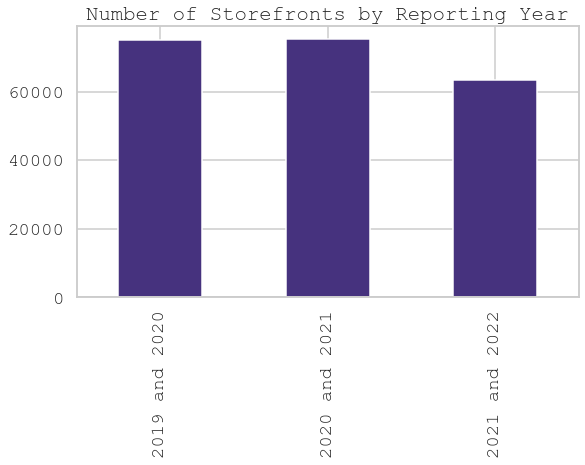

In [41]:
storefronts_focuscols['Reporting Year'].value_counts(sort=False).plot(kind='bar',
                                                                      figsize=(9,5),
                                                                      title='Number of Storefronts by Reporting Year');

### 4.2 What is the distribution of boroughs represented in the dataset?

In [42]:
storefronts_focuscols['BOROUGH'].value_counts()

MANHATTAN        77566
BROOKLYN         51211
QUEENS           46920
BRONX            29510
STATEN ISLAND     9039
Name: BOROUGH, dtype: int64

In [44]:
storefronts_focuscols['BOROUGH'].value_counts(normalize=True)

MANHATTAN       0.36
BROOKLYN        0.24
QUEENS          0.22
BRONX           0.14
STATEN ISLAND   0.04
Name: BOROUGH, dtype: float64

<AxesSubplot:title={'center':'Number of Storefronts by NYC Borough'}>

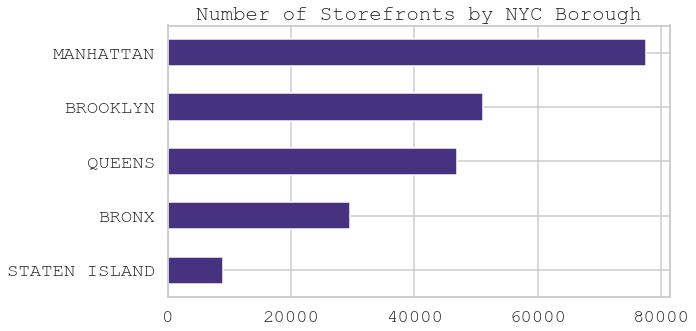

In [49]:
storefronts_focuscols['BOROUGH'].value_counts().sort_values().plot(kind='barh',
                                                     figsize=(9,5),
                                                     title='Number of Storefronts by NYC Borough')

### 4.3 What was the proportion of storefronts vacant as of 12/31 for each reporting year? 

In [60]:
# for '2019 and 2020' reporting year

storefronts_focuscols.loc[storefronts_focuscols['Reporting Year'] == '2019 and 2020']['VACANT ON 12/31'].value_counts(normalize=True)

NO    0.91
YES   0.09
Name: VACANT ON 12/31, dtype: float64

In [59]:
# for '2020 and 2021' reporting year

storefronts_focuscols.loc[storefronts_focuscols['Reporting Year'] == '2020 and 2021']['VACANT ON 12/31'].value_counts(normalize=True)

NO    0.89
YES   0.11
Name: VACANT ON 12/31, dtype: float64

In [61]:
# for '2021 and 2022' reporting year

storefronts_focuscols.loc[storefronts_focuscols['Reporting Year'] == '2021 and 2022']['VACANT ON 12/31'].value_counts(normalize=True)

NO    0.90
YES   0.10
Name: VACANT ON 12/31, dtype: float64

### 4.4 What was the proportion of storefronts undergoing construction as for each reporting year? 

In [63]:
# for '2019 and 2020' reporting year

storefronts_focuscols.loc[storefronts_focuscols['Reporting Year'] == '2019 and 2020']['CONSTRUCTION REPORTED'].value_counts(dropna=False, normalize=True)

NaN   0.99
YES   0.01
Name: CONSTRUCTION REPORTED, dtype: float64

In [64]:
# for '2020 and 2021' reporting year

storefronts_focuscols.loc[storefronts_focuscols['Reporting Year'] == '2020 and 2021']['CONSTRUCTION REPORTED'].value_counts(dropna=False, normalize=True)

NaN   0.99
YES   0.01
Name: CONSTRUCTION REPORTED, dtype: float64

In [65]:
# for '2021 and 2022' reporting year

storefronts_focuscols.loc[storefronts_focuscols['Reporting Year'] == '2021 and 2022']['CONSTRUCTION REPORTED'].value_counts(dropna=False, normalize=True)

NaN   1.00
YES   0.00
Name: CONSTRUCTION REPORTED, dtype: float64

### 4.5 What is the distribution of primary business activities represented in the dataset?

In [66]:
storefronts_focuscols[ 'PRIMARY BUSINESS ACTIVITY'].value_counts()

RETAIL                              61170
FOOD SERVICES                       41421
OTHER                               33950
NO BUSINESS ACTIVITY IDENTIFIED     28846
MISCELLANEOUS OTHER SERVICE         15256
HEALTH CARE or SOCIAL ASSISTANCE     8499
FINANCE & INSURANCE                  5295
REAL ESTATE                          4434
HEALTH CARE OR SOCIAL ASSISTANCE     4213
EDUCATIONAL SERVICES                 2649
WHOLESALE                            2441
ACCOUNTING SERVICES                  1646
LEGAL SERVICES                       1237
MANUFACTURING                        1114
INFORMATION SERVICES                  789
BROADCASTING/TELECOMM                 695
MOVIES/VIDEO/SOUND                    474
PUBLISHING                            117
Name: PRIMARY BUSINESS ACTIVITY, dtype: int64

In [67]:
storefronts_focuscols[ 'PRIMARY BUSINESS ACTIVITY'].value_counts(normalize=True)

RETAIL                             0.29
FOOD SERVICES                      0.19
OTHER                              0.16
NO BUSINESS ACTIVITY IDENTIFIED    0.13
MISCELLANEOUS OTHER SERVICE        0.07
HEALTH CARE or SOCIAL ASSISTANCE   0.04
FINANCE & INSURANCE                0.02
REAL ESTATE                        0.02
HEALTH CARE OR SOCIAL ASSISTANCE   0.02
EDUCATIONAL SERVICES               0.01
WHOLESALE                          0.01
ACCOUNTING SERVICES                0.01
LEGAL SERVICES                     0.01
MANUFACTURING                      0.01
INFORMATION SERVICES               0.00
BROADCASTING/TELECOMM              0.00
MOVIES/VIDEO/SOUND                 0.00
PUBLISHING                         0.00
Name: PRIMARY BUSINESS ACTIVITY, dtype: float64

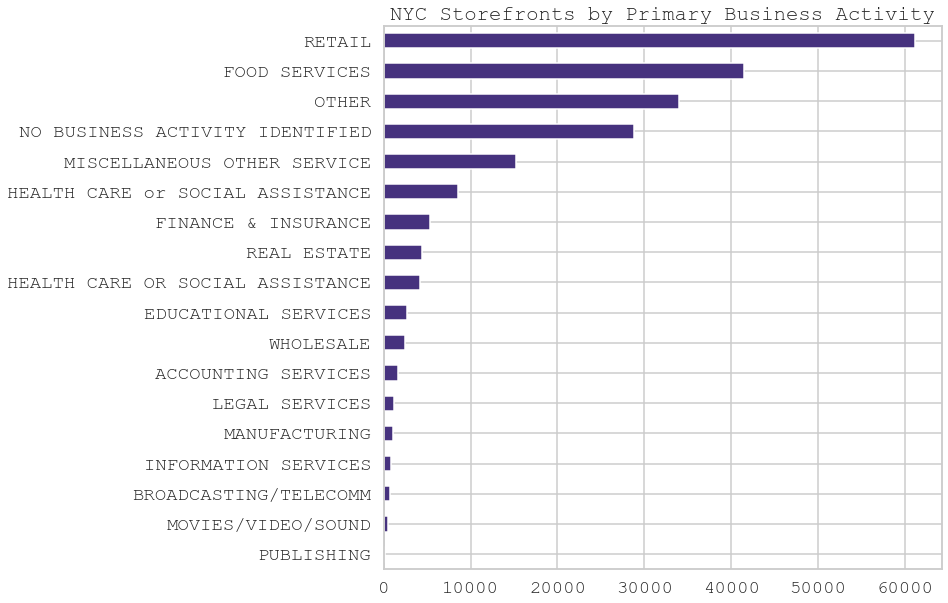

In [72]:
storefronts_focuscols[ 'PRIMARY BUSINESS ACTIVITY'].value_counts().sort_values().plot(kind='barh',
                                                                        figsize=(10,10),
                                                                        title="NYC Storefronts by Primary Business Activity");

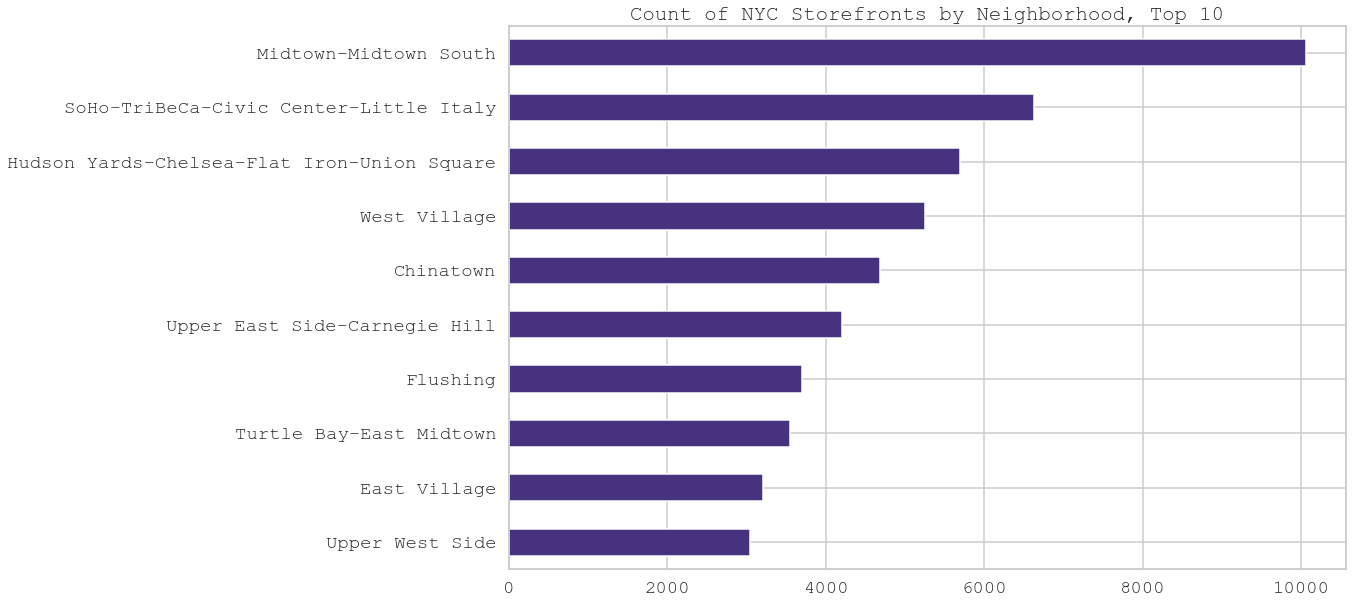

In [80]:
storefronts_focuscols['NBHD'].value_counts().nlargest(10).sort_values().plot(kind='barh',
                                                                        figsize=(15,10),
                                                                        title="Count of NYC Storefronts by Neighborhood, Top 10");

---

## 5. Examine combinations of variables in the dataset

In [ ]:
### examples of using groupby to analyze data ###

# groupby a single column and apply a single aggregate function
# df.groupby('Pclass').mean()


# groupby a single column and apply multiple aggregate functions (with renaming)
# df.groupby('Pclass').agg(min_age = ('Age','min'), avg_age = ('Age', 'mean'), max_age = ('Age', 'max') )


# groupby multiple columns and apply multiple aggregate functions (with renaming)
# df.groupby(['Pclass','Sex']).agg(min_age = ('Age','min'), avg_age = ('Age', 'mean'), max_age = ('Age', 'max') )

In [ ]:
### examples of using crosstab to analyze data ###

# find the percentage of how often each combination of two categories occur (across the entire table)
# pd.crosstab(df.make, df.body_style, normalize=True)


# find the count of how often each combination of two categories occur
# pd.crosstab(df.make, df.body_style)


# find counts at the intersection of two categories AND add show total by row and column
# pd.crosstab(df.make, df.num_doors, margins=True, margins_name="Total")


# group values at two intersections AND find the mean AND round to the nearest whole number
# pd.crosstab(df.make, df.body_style, values=df.curb_weight, aggfunc='mean').round(0)


# find the percentage of how often each combination of two categories occur (across the entire table)
# pd.crosstab(df.make, df.body_style, normalize=True)


# find the percentage of how often each combination of two categories occur (within each column)
# pd.crosstab(df.make, df.body_style, normalize='columns')


# find the percentage of how often each combination of two categories occur (within each row)
# pd.crosstab(df.make, df.body_style, normalize='index')

In [ ]:
### pivot table syntax and options ###

pd.pivot_table(data=df, # the DataFrame being used to create the pivot table
               values='Average Price', # the column containing the values to summarize
               index=['year', 'region'], # the rows of the pivot table; one ore more columns, multiple columns will create mutltiindex in pivot table
               columns='type' # splits categories contained within a Series into multiple columns in the pivot table (optional)
               aggfunc='median', # aggregation function used to summarize the data (default is mean)
               margins=True, # shows totals for rows and columns (default is False)
               margins_name='Totals' # specifies the name given to the totals displayed (default is 'All')
               sort=False ) # specifies if the result should be sorted (default is true)

### 5.1 Analysis of {Variable A vs. Variable B}

### 5.2 Analysis of {Variable B vs. Variable C}

### 5.3 Analysis of {Variable A vs. Variable C}

---

## **Next steps**

In [ ]:
# export data for data graphic creation

# data = cases2022['COMPLAINT_TYPE'].value_counts()

In [ ]:
# data.to_csv('complaints_by_type.csv')

***

---